<a href="https://colab.research.google.com/github/lillylovecode/GenerativeAI_class/blob/main/%E9%AB%98%E9%86%AB112572101%E9%86%AB%E7%AE%A1%E8%B3%87%E7%A2%A9%E4%BA%8C%E7%8E%8B%E4%BF%90%E4%BA%91_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 作業題目： 製作手寫辨識的神經網路模型
範例：3層深度學習, 設第一層 N1 神經元, 第二層 N2, 第三層 N3

嘗試一： 5層深度學習

嘗試二： 2層深度學習

In [ ]:
"""範例"""
# N1 = 20
# N2 = 20
# N3 = 20

"""test01"""
# N1 = 160
# N2 = 80
# N3 = 40
# N4 = 20
# N5 = 10

"""test02"""
N1 = 160 #增加第一層訓練神經元
N2 = 10

## 1. 讀入套件

讀入web應用程式套件

In [ ]:
!pip install gradio

In [ ]:
#使畫圖的結果顯示在Jupyter Notebook
%matplotlib inline

# 標準數據分析、畫圖套件
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 神經網路方面
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# 互動設計用
from ipywidgets import interact_manual

# 神速打造 web app 的 Gradio
import gradio as gr

## 2. 讀入 MNIST 數據庫
參考數據庫的[原始網頁](http://yann.lecun.com/exdb/mnist/)。


### 2.1 由 Keras 讀入 MNIST

直接從 Keras 下載 MNIST 數據庫, 並讀進來 (第一次要花點時間)。

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

訓練資料有 6 萬筆、測試資料有 1萬筆。

In [ ]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


In [ ]:
x_train.shape #原始資料

(60000, 28, 28)

In [ ]:
x_train[1234] #查看第1314筆資料

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
        255, 129,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
        253, 252, 215,  60,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53,
        150, 249, 252, 252,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 138, 252, 252, 177,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   7, 129, 252, 243,  65,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  33, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 112, 210, 252, 212,  35,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  69, 177,
        240, 249, 252, 252, 177,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193, 252,
        253, 252, 240,  59,  41,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193, 252,
        253, 252, 245,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        149, 173, 253, 253, 178,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  11, 179, 252, 195,  18,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  67, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  15, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9, 153,  12,   0,   0,
          0,   0,  60, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   9, 144, 252, 129,   7,   0,
          0,   0, 164, 252, 199,  22,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  75, 252, 252, 252,  59,   0,
        134, 134, 210, 252,  99,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,  32, 210, 252, 241, 238,
        253, 252, 252, 252,  29,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 112, 241, 252,
        253, 252, 222, 136,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 106, 252,
        253, 216,  36,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
y_train[1234] #對照答案

3

### 2.2 查看數據庫的內容

每筆輸入 (x) 就是一個手寫的 0-9 中一個數字的圖檔, 大小為 28x28。\
而輸出 (y) 就是「正確答案」。

In [ ]:
def show_data(n = 100):
    X = x_train[n]
    print(X)

In [ ]:
interact_manual(show_data, n=(0,59999));

interactive(children=(IntSlider(value=100, description='n', max=59999), Button(description='Run Interact', sty…

### 2.3 輸入格式整理-reshape

我們現在要用標準神經網路學學手寫辨識，原來的每筆數據是個 28x28 的矩陣 (array), 但標準神經網路只吃「平平的」, 也就是每次要 28x28=784 長的向量，因此我們要用 `reshape` 調校一下。

In [ ]:
x_train = x_train.reshape(60000, 784)/255 #壓成0-255 將矩陣壓成向量
x_test = x_test.reshape(10000, 784)/255

In [ ]:
x_train.shape

(60000, 784)

### 2.4 輸出格式整理-one hot encoding

In [ ]:
y_train[43210]

9

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train[43210]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

## 3. 建立神經網路

我們的函數長相是這樣，從784維向量分成10類

$$\hat{f} \colon \mathbb{R}^{784} \to \mathbb{R}^{10}$$

接下來只需要再決定要幾個隱藏層、每層要幾個神經元, 用哪個激發函數就可以了。

### 3.1 決定神經網路架構、讀入相關套件

假如我們要用 ReLU 當激發函數, 要設計神經網路, 再來就是要指定多少個隱藏層、每層多少個神經元就完成了!


### 3.2 建構我們的神經網路

和以前做迴歸或機器學習一樣, 我們就打開個「函數學習機」。標準一層一層傳遞的神經網路叫 `Sequential`, 於是我們打開一個空的神經網路。

In [ ]:
model = Sequential()

每次用 `add` 加一層, 從第一個隱藏層開始。而第一個隱藏層因為 TensorFlow 當然猜不到輸入有 784 個 features, 所以我們要告訴它。

In [ ]:
model.add(Dense(N1, input_dim=784, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


第二層開始就不用再說明輸入神經元個數 (等於前一層神經元數)。

In [ ]:
model.add(Dense(N2, activation='sigmoid'))

In [ ]:
# model.add(Dense(N3, activation='relu'))
# model.add(Dense(N4, activation='relu'))

輸出有 10 個數字, 所以輸出層的神經元是 10 個! 而如果我們的網路輸出是

$$(y_1, y_2, \ldots, y_{10})$$

我們還希望輸出的機率加起來是1，數學式表達如下

$$\sum_{i=1}^{10} y_i = 1$$

因此要用 `softmax` 當激發函數!!

In [ ]:
model.add(Dense(10, activation='softmax'))

### 3.3 組裝

和之前比較不一樣的是我們還要做 `compile` 才正式把我們的神經網路建好。你可以發現我們還需要做幾件事:

* 決定使用的 loss function, 一般是 `mse`
* 決定 optimizer, 我們用標準的 SGD 梯度下降法
* 設 learning rate

為了一邊訓練一邊看到結果, 我們加設

    metrics=['accuracy']
    
本行和神經網路功能沒有什麼關係。

In [ ]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy'])

## 4. 檢視神經網路

檢視神經網路架構, 可以確認一下是不是和想像的一樣。

### 4.1 看 model 的 summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 160)                 │         125,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,610 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,320 (497.34 KB)

 Trainable params: 127,320 (497.34 KB)

 Non-trainable params: 0 (0.00 B)

## 5. 訓練神經網路

現在完成了神經網路的建置。現在要訓練的時候, 你會發現不是把訓練資料送進去就好。這裡我們還有兩件事要決定:

* 一次要訓練幾筆資料 (`batch_size`)
* 這 6 萬筆資料一共要訓練幾次 (`epochs`)

於是最精彩的就來了。然後就是開始等待他訓練...

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1102 - loss: 0.0903
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2259 - loss: 0.0879
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2484 - loss: 0.0853
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2804 - loss: 0.0826
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3201 - loss: 0.0798
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3559 - loss: 0.0775
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4057 - loss: 0.0747
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4453 - loss: 0.0721
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4783 - loss: 0.0692
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5135 - loss: 0.0662


epoch改訓練100次

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5443 - loss: 0.0636
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5845 - loss: 0.0606
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6267 - loss: 0.0580
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6684 - loss: 0.0553
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7059 - loss: 0.0522
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7221 - loss: 0.0498
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7402 - loss: 0.0472
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7529 - loss: 0.0448
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7596 - loss: 0.0428
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7704 - loss: 0.0407
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7796 - loss: 0.0390
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

## 6. 比較及呈現結果

看看神經網路學習成果。

這是batch_size=100,epoch=10的圖形，看起來還沒有收斂。

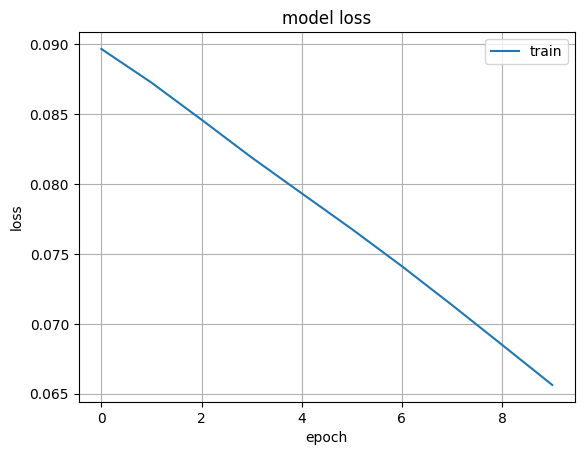

In [ ]:
#prompt: 畫出epoch-loss圖
plt.plot(model.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train'], loc='upper right')

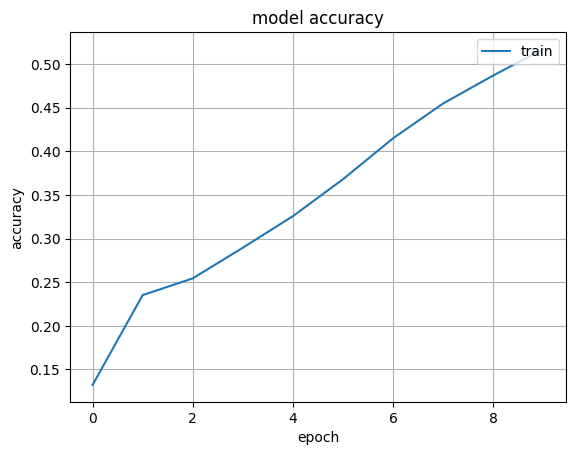

In [ ]:
# 畫出epoch-accuracy圖
plt.plot(model.history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train'], loc='upper right')

接下來看epoch改100的圖

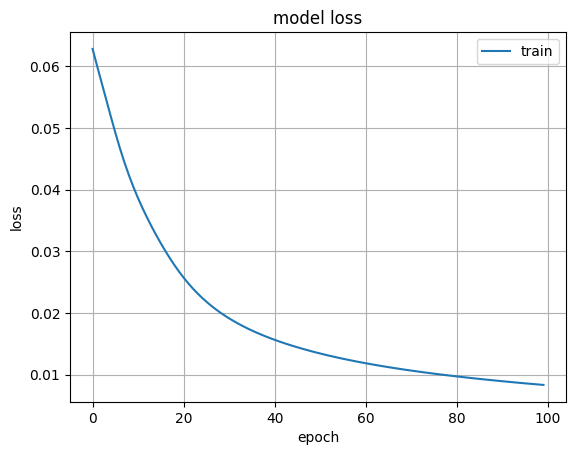

In [ ]:
#prompt: 畫出epoch-loss圖
plt.plot(model.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train'], loc='upper right')

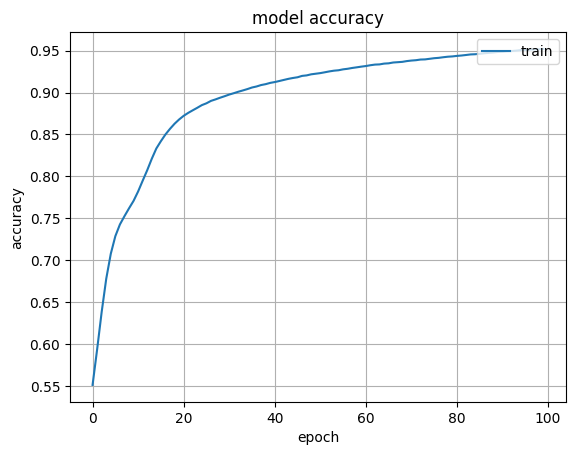

In [ ]:
# 畫出epoch-accuracy圖
plt.plot(model.history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train'], loc='upper right')

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0046


In [ ]:
"""範例模型的正確率"""
print(f"測試資料正確率 {acc*100:.2f}%")

測試資料正確率 11.35%


In [ ]:
"""test01模型的正確率"""
print(f"測試資料正確率 {acc*100:.2f}%")

測試資料正確率 92.22%


In [ ]:
"""test02模型的正確率"""
#設epoch=100
print(f"測試資料正確率 {acc*100:.2f}%")

測試資料正確率 97.49%


"predict" 放的是神經網路的學習結果。做完之後用 argmax 找到數值最大的那一項。

In [ ]:
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
predict

array([7, 6, 1, ..., 4, 8, 6])

 由於`x_test` 每筆資料已經換成 784 維的向量, 要調整回 28x28 的矩陣才能當成圖形顯示出來!

In [ ]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

In [ ]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

到底測試資料總體狀況如何呢? 我們可以給神經網路「總評量」。

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9393 - loss: 0.0096


loss大小不一定重要，因為每個問題的單位不一樣

In [ ]:
"""範例模型的正確率"""
print('loss:', score[0])
print('正確率', score[1])

loss: 0.08995620161294937
正確率 0.11349999904632568


In [ ]:
"""test01模型的正確率"""
#設batch_size=100，epoch=10
print('loss:', score[0])
print('正確率', score[1])

loss: 0.007877368479967117
正確率 0.9480000138282776


In [ ]:
"""test02模型的正確率"""
#設batch_size=100，epoch=100
print('loss:', score[0])
print('正確率', score[1])

loss: 0.00838368572294712
正確率 0.9480000138282776


### 7. 用 Gradio 來展示(簡易網頁APP)
記得要colab打開並且執行的情況下才能動

In [ ]:
def resize_image(inp):
    # 圖在 inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成 PIL 格式
    image_pil = Image.fromarray(image)

    # Alpha 通道設為白色, 再把圖從 RGBA 轉成 RGB
    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3]) # 把圖片粘貼到白色背景上，使用透明通道作為遮罩
    image_pil = background

    # 轉換為灰階圖像
    image_gray = image_pil.convert("L")

    # 將灰階圖像縮放到 28x28, 轉回 numpy array
    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    # 配合 MNIST 數據集
    img_array = 255 - img_array

    # 拉平並縮放
    img_array = img_array.reshape(1, 784) / 255.0

    return img_array

In [ ]:
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}

In [ ]:
# Gradio設定介面的方式
iface = gr.Interface(
    fn=recognize_digit, #執行function
    inputs=gr.Sketchpad(), #輸入:手寫板
    outputs=gr.Label(num_top_classes=3), #輸出:標籤 數字最大的前三個
    title="MNIST 手寫辨識",
    description="請在畫板上繪製數字"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://9b72c7aee25c17fc7d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://9b72c7aee25c17fc7d.gradio.live


# 本周個人發現


這次測試了 `1.層數`  `2.訓練次數`  對結果正確率的影響









### 1. 層數
一開始老師使用三層，我後來試了用五層跟兩層，使用同樣的訓練次數10次，發現用五層跟兩層相比，五層的正確率較高(正確率 92.22%)。




### 2. 訓練次數
由於兩層的訓練結果較差，我提高了訓練次數，想看看是否能提高正確率，結果確實100次相較10次提高許多(測試資料正確率提高到 97.49%)，畫出來的圖形看起來也有漂亮的收斂曲線。

### 注意事項
1. 重跑的時候要把執行階段關掉重開，才不會導致在已經有的結果上繼續training，比較的結果不準
2. 畫圖的程式碼有請AI幫忙生成，prompt就是上面的註解

## Gradio結果
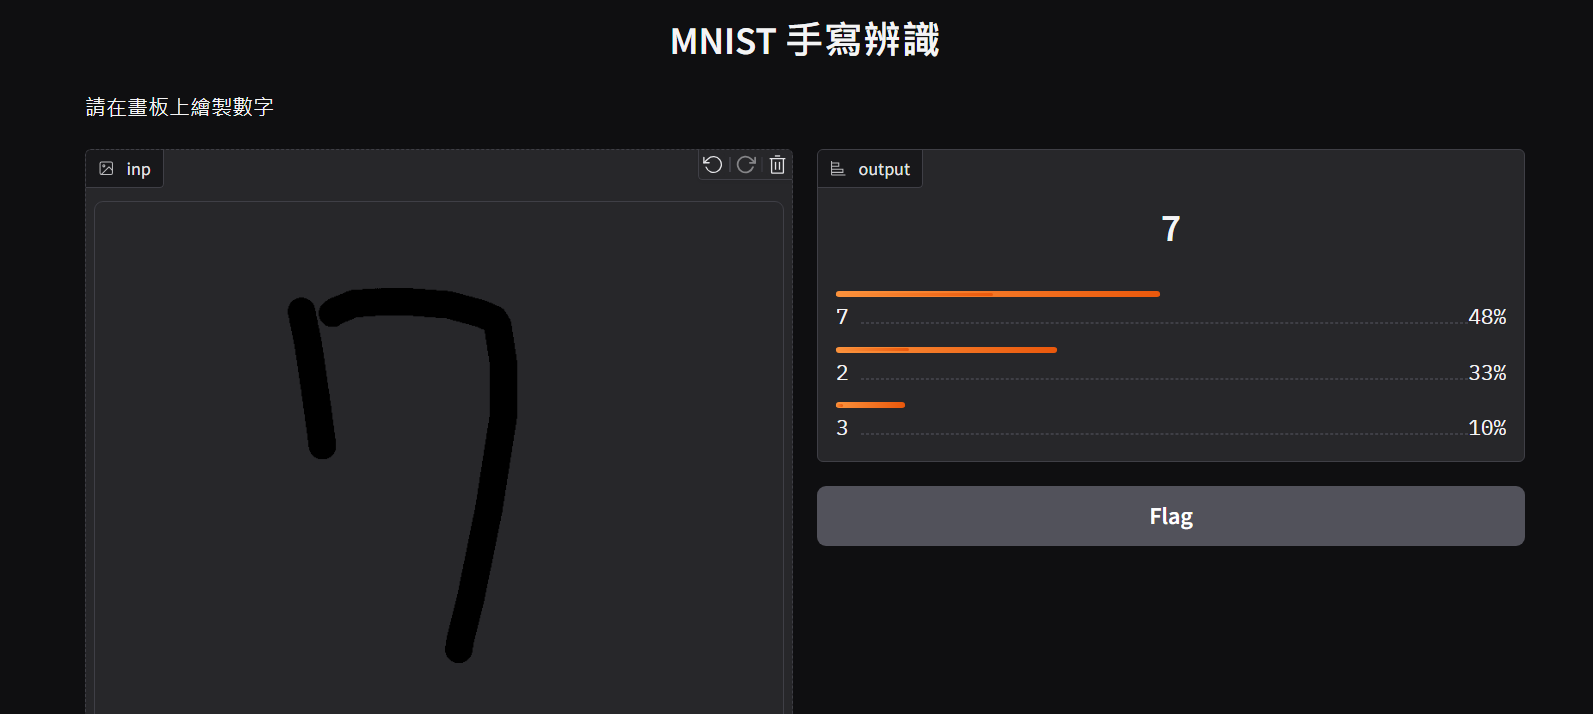